### Install The Required Libraries

In [1]:
!pip install transformers
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

###Import The Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import AutoModel,BertTokenizerFast
import torch
import torch.nn as nn
from transformers import AdamW
from torch.nn import NLLLoss
from sklearn.metrics import classification_report

###Load The Dataset

In [3]:
#Load the datasets and add the appropriate labels
true_data=pd.read_csv('/content/True.csv')
fake_data=pd.read_csv('/content/Fake.csv')
true_data['label']='True'
fake_data['label']='Fake'

In [4]:
#Concatenate the datasets
data=pd.concat([true_data,fake_data])
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [5]:
#Convert the target column into 0/1 label
data['label']=pd.get_dummies(data['label'],drop_first=True)['True'].astype(int)

In [6]:
data['label'].value_counts()

,count
label,
0,23481
1,21417


([<matplotlib.patches.Wedge at 0x7dc5b1144be0>,
 [Text(-0.07936302786338077, 1.0971333145102997, 'Fake'),
  Text(0.07936313058441406, -1.0971333070797922, 'True')],
 [Text(-0.043288924289116786, 0.5984363533692544, '52.3%'),
  Text(0.0432889803187713, -0.5984363493162502, '47.7%')])

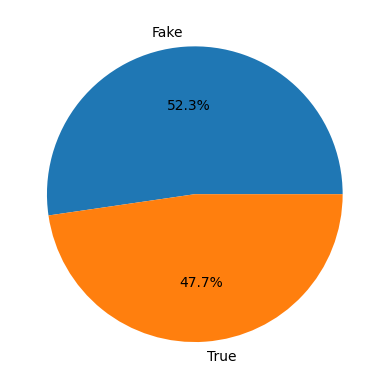

In [7]:
plt.pie(data['label'].value_counts(),labels=['Fake','True'],autopct='%1.1f%%')

###Split Dataset Into Training Test Validation Ratio 70:15:15

In [8]:
train_data,temp_data,train_label,temp_label=train_test_split(data['title'],data['label'],test_size=0.3,random_state=30)
val_data,test_data,val_label,test_label=train_test_split(temp_data,temp_label,test_size=0.5,random_state=30)

###BERT Fine Tuning

In [9]:
#Load the Bert model and the Tokenizer
bert=AutoModel.from_pretrained('bert-base-uncased')
tokenizer=BertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:81: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


###Prepare Th Input Data

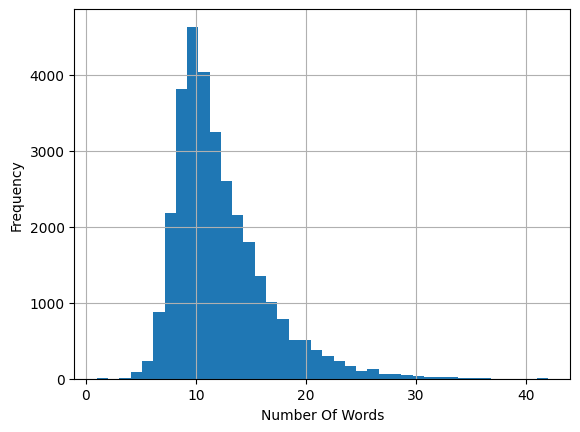

In [10]:
Seq_len=[len(title.split()) for title in train_data]
plt.hist(Seq_len,bins=40)
plt.xlabel('Number Of Words')
plt.ylabel('Frequency')
plt.grid()
plt.show()

###Majority Of Text Has Max Length Of 15

In [11]:
MAX_LENGTH=15

#Tokenize and encode the sentences in the train set
tokens_train=tokenizer.batch_encode_plus(
    train_data.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True
)

#Tokenize and encode the sentences in the validation set
tokens_val=tokenizer.batch_encode_plus(
    val_data.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True
)

#Tokenize and encode the sentences in the test set
tokens_test=tokenizer.batch_encode_plus(
    test_data.tolist(),
    max_length=MAX_LENGTH,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [12]:
import torch
###Convert the lists to tensors
train_seq=torch.tensor(tokens_train['input_ids'])
train_mask=torch.tensor(tokens_train['attention_mask'])
train_y=torch.tensor(train_label.tolist())

val_seq=torch.tensor(tokens_val['input_ids'])
val_mask=torch.tensor(tokens_val['attention_mask'])
val_y=torch.tensor(val_label.tolist())

test_seq=torch.tensor(tokens_test['input_ids'])
test_mask=torch.tensor(tokens_test['attention_mask'])
test_y=torch.tensor(test_label.tolist())

In [13]:
# Data Loader structure definitions
from torch.utils.data import TensorDataset,DataLoader,RandomSampler,SequentialSampler
batch_size=32

train_data=TensorDataset(train_seq,train_mask,train_y) #Wrap Tensors
train_sampler=RandomSampler(train_data)
train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

val_data=TensorDataset(val_seq,val_mask,val_y) #Wrap Tensors
val_sampler=RandomSampler(val_data)
val_dataloader=DataLoader(val_data,sampler=val_sampler,batch_size=batch_size)



In [14]:
#Freeze the model weights before fine tuning
for params in bert.parameters():
  params.requires_grad=False

###Define Model Architecture

In [15]:
class BERTMODEL(nn.Module):
  def __init__(self,bert):
    super().__init__()
    self.bert=bert
    self.drop_out=nn.Dropout(0.1)
    self.reLu=nn.ReLU()
    self.fc1=nn.Linear(768,512)
    self.fc2=nn.Linear(512,2)
    self.softmax=nn.LogSoftmax(dim=1)

  def forward(self,sent_id,mask):
    cls_hs=self.bert(sent_id,attention_mask=mask)['pooler_output']

    x=self.fc1(cls_hs)
    x=self.reLu(x)
    x=self.drop_out(x)
    x=self.fc2(x)
    x=self.softmax(x)
    return x

model=BERTMODEL(bert)

criterion=NLLLoss()
optimizer=AdamW(model.parameters(),lr=1e-5)
epoches=2

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


###Define The Training Loop And The Validation Loop

In [16]:
from tqdm import tqdm

def train():
  model.train() #Set the model in training mode
  total_loss=0
  progress_bar=tqdm(enumerate(train_dataloader),total=len(train_dataloader),desc='Training')
  for batchno,batch in enumerate(train_dataloader):
    if 0==batchno%50 and 0!=batchno:
      print(f"Batch_Number: {batchno:>5} of Batches:{len(train_dataloader)}")
    optimizer.zero_grad()
    batch=[r for r in batch]
    sequence,mask,label=batch
    output=model(sequence,mask)
    loss=criterion(output,label)
    total_loss+=loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
    optimizer.step()
    preds=output.detach().cpu().numpy()   # model predictions are stored on GPU. So, push it to CPU

    # Update the progress bar description with the loss
    progress_bar.set_postfix({"Loss": loss.item()})


  avg_loss=total_loss/len(train_dataloader)

  return avg_loss


def evaluate():
  print("Evaluating")
  model.eval() #set the model in the evaluation mode
  total_loss=0
  progress_bar=tqdm(enumerate(val_dataloader),total=len(val_dataloader),desc='Validation')
  for batchno,batch in enumerate(val_dataloader):
    if 0==batchno%50 and 0!=batchno:
      print(f"Batch_Number: {batchno:>5} of Batches:{len(val_dataloader)}")
    batch=[r for r in batch]
    sequence,mask,label=batch
    with torch.no_grad():      #Disable the gradient calculation during the evaluation mode
      output=model(sequence,mask)
      loss=criterion(output,label)
      total_loss+=loss.item()
      preds=output.detach().cpu().numpy()   # model predictions are stored on GPU. So, push it to CPU

  #Update the progress bar description with the loss
  progress_bar.set_postfix({'Loss':loss.item()})

  avg_loss=total_loss/len(val_dataloader)

  return avg_loss



###Model Training

In [17]:
for epoch in range(epoches):
  print(f"Epoch:{epoch+1} of Epoches:{epoches}")
  train_loss=train()
  val_loss=evaluate()
  print(f"Training Loss:{train_loss:.3f}")
  print(f"Validation Loss:{val_loss:.3f}")

Epoch:1 of Epoches:2


Training:   0%|          | 0/983 [01:30<?, ?it/s, Loss=0.615]

Batch_Number:    50 of Batches:983


Training:   0%|          | 0/983 [02:58<?, ?it/s, Loss=0.614]

Batch_Number:   100 of Batches:983


Training:   0%|          | 0/983 [04:26<?, ?it/s, Loss=0.6]  

Batch_Number:   150 of Batches:983


Training:   0%|          | 0/983 [05:54<?, ?it/s, Loss=0.514]

Batch_Number:   200 of Batches:983


Training:   0%|          | 0/983 [07:23<?, ?it/s, Loss=0.566]

Batch_Number:   250 of Batches:983


Training:   0%|          | 0/983 [08:51<?, ?it/s, Loss=0.54] 

Batch_Number:   300 of Batches:983


Training:   0%|          | 0/983 [10:19<?, ?it/s, Loss=0.56] 

Batch_Number:   350 of Batches:983


Training:   0%|          | 0/983 [11:47<?, ?it/s, Loss=0.62] 

Batch_Number:   400 of Batches:983


Training:   0%|          | 0/983 [13:15<?, ?it/s, Loss=0.575]

Batch_Number:   450 of Batches:983


Training:   0%|          | 0/983 [14:43<?, ?it/s, Loss=0.513]

Batch_Number:   500 of Batches:983


Training:   0%|          | 0/983 [16:11<?, ?it/s, Loss=0.54] 

Batch_Number:   550 of Batches:983


Training:   0%|          | 0/983 [17:38<?, ?it/s, Loss=0.49] 

Batch_Number:   600 of Batches:983


Training:   0%|          | 0/983 [19:06<?, ?it/s, Loss=0.541]

Batch_Number:   650 of Batches:983


Training:   0%|          | 0/983 [20:35<?, ?it/s, Loss=0.476]

Batch_Number:   700 of Batches:983


Training:   0%|          | 0/983 [22:02<?, ?it/s, Loss=0.509]

Batch_Number:   750 of Batches:983


Training:   0%|          | 0/983 [23:30<?, ?it/s, Loss=0.498]

Batch_Number:   800 of Batches:983


Training:   0%|          | 0/983 [24:58<?, ?it/s, Loss=0.536]

Batch_Number:   850 of Batches:983


Training:   0%|          | 0/983 [26:25<?, ?it/s, Loss=0.591]

Batch_Number:   900 of Batches:983


Training:   0%|          | 0/983 [27:53<?, ?it/s, Loss=0.481]

Batch_Number:   950 of Batches:983


Training:   0%|          | 0/983 [28:49<?, ?it/s, Loss=0.48]


Evaluating


Validation:   0%|          | 0/211 [00:00<?, ?it/s]

Batch_Number:    50 of Batches:211
Batch_Number:   100 of Batches:211
Batch_Number:   150 of Batches:211
Batch_Number:   200 of Batches:211


Validation:   0%|          | 0/211 [05:58<?, ?it/s, Loss=0.573]


Training Loss:0.562
Validation Loss:0.483
Epoch:2 of Epoches:2


Training:   0%|          | 0/983 [01:27<?, ?it/s, Loss=0.497]

Batch_Number:    50 of Batches:983


Training:   0%|          | 0/983 [02:54<?, ?it/s, Loss=0.487]

Batch_Number:   100 of Batches:983


Training:   0%|          | 0/983 [04:21<?, ?it/s, Loss=0.439]

Batch_Number:   150 of Batches:983


Training:   0%|          | 0/983 [05:48<?, ?it/s, Loss=0.407]

Batch_Number:   200 of Batches:983


Training:   0%|          | 0/983 [07:15<?, ?it/s, Loss=0.482]

Batch_Number:   250 of Batches:983


Training:   0%|          | 0/983 [08:43<?, ?it/s, Loss=0.413]

Batch_Number:   300 of Batches:983


Training:   0%|          | 0/983 [10:11<?, ?it/s, Loss=0.512]

Batch_Number:   350 of Batches:983


Training:   0%|          | 0/983 [11:39<?, ?it/s, Loss=0.381]

Batch_Number:   400 of Batches:983


Training:   0%|          | 0/983 [13:07<?, ?it/s, Loss=0.536]

Batch_Number:   450 of Batches:983


Training:   0%|          | 0/983 [14:35<?, ?it/s, Loss=0.518]

Batch_Number:   500 of Batches:983


Training:   0%|          | 0/983 [16:03<?, ?it/s, Loss=0.376]

Batch_Number:   550 of Batches:983


Training:   0%|          | 0/983 [17:32<?, ?it/s, Loss=0.448]

Batch_Number:   600 of Batches:983


Training:   0%|          | 0/983 [19:00<?, ?it/s, Loss=0.458]

Batch_Number:   650 of Batches:983


Training:   0%|          | 0/983 [20:28<?, ?it/s, Loss=0.334]

Batch_Number:   700 of Batches:983


Training:   0%|          | 0/983 [21:56<?, ?it/s, Loss=0.562]

Batch_Number:   750 of Batches:983


Training:   0%|          | 0/983 [23:25<?, ?it/s, Loss=0.368]

Batch_Number:   800 of Batches:983


Training:   0%|          | 0/983 [24:53<?, ?it/s, Loss=0.396]

Batch_Number:   850 of Batches:983


Training:   0%|          | 0/983 [26:21<?, ?it/s, Loss=0.478]

Batch_Number:   900 of Batches:983


Training:   0%|          | 0/983 [27:49<?, ?it/s, Loss=0.472]

Batch_Number:   950 of Batches:983


Training:   0%|          | 0/983 [28:45<?, ?it/s, Loss=0.375]


Evaluating


Validation:   0%|          | 0/211 [00:00<?, ?it/s]

Batch_Number:    50 of Batches:211
Batch_Number:   100 of Batches:211
Batch_Number:   150 of Batches:211
Batch_Number:   200 of Batches:211


Validation:   0%|          | 0/211 [05:54<?, ?it/s, Loss=0.489]

Training Loss:0.467
Validation Loss:0.410


###Save The Model

In [18]:
torch.save(model.state_dict(),'BERTModel_weights.pt')

###Model Performance

In [19]:
#Load the model weights
model.load_state_dict(torch.load('/content/BERTModel_weights.pt'))

<ipython-input-19-736ea9c904e1>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/BERTModel_weights.pt'))


<All keys matched successfully>

In [21]:
with torch.no_grad():
  preds=model(test_seq,test_mask)
  preds=preds.detach().cpu().numpy()
  preds=np.argmax(preds,axis=1)
print(f"Classification Report:{classification_report(preds,test_label)}")

Classification Report:              precision    recall  f1-score   support

           0       0.74      0.91      0.82      2863
           1       0.92      0.77      0.84      3872

    accuracy                           0.83      6735
   macro avg       0.83      0.84      0.83      6735
weighted avg       0.85      0.83      0.83      6735

